<a href="https://colab.research.google.com/github/Garima63/Co2-Data-Emission-from-1960-2019/blob/main/CO_2_Emission_Data_(1960_2019).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This Project will throw light on Countries and their Contribution in CO2 emission from 1960-2019. Additionally, it also emphasis on some below points.

a)Low Emission Countries.

b) Medium Emissionn Countries.

c) High Emission Countries

**Assumption**: All Countries tries to opt for their good efforts to reduce this CO2 emission.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
 from google.colab import files
 uploaded = files.upload()

Saving co2_emissions_kt_by_country.csv to co2_emissions_kt_by_country.csv
Saving country-and-continent-codes-list-csv.csv to country-and-continent-codes-list-csv.csv


In [3]:
df = pd.read_csv("/content/co2_emissions_kt_by_country.csv")
df.shape

(13953, 4)

In [4]:
df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [5]:
continent_data = pd.read_csv("/content/country-and-continent-codes-list-csv.csv")
continent_data.shape

(262, 2)

In [6]:
continent_data.head()

,Continent_Name,country_code
0,Asia,AFG
1,Europe,ALB
2,Antarctica,ATA
3,Africa,DZA
4,Oceania,ASM


In [7]:
new_data = pd.merge(df,continent_data,how='inner',on= 'country_code')
new_data.shape

(11394, 5)

In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11394 entries, 0 to 11393
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_code    11394 non-null  object 
 1   country_name    11394 non-null  object 
 2   year            11394 non-null  int64  
 3   value           11394 non-null  float64
 4   Continent_Name  11394 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 534.1+ KB


#Observation: 

This dataset has no null value.

Year has an interger value.

Value represents Co2 emmission number in Kt. 

In [9]:
new_data.isna().sum().sort_values

<bound method Series.sort_values of country_code      0
country_name      0
year              0
value             0
Continent_Name    0
dtype: int64>

In [10]:
new_data.head(2)

,country_code,country_name,year,value,Continent_Name
0,ABW,Aruba,1960,11092.675,North America
1,ABW,Aruba,1961,11576.719,North America


In [11]:
new_data.country_name.value_counts()

Russian Federation           120
Cyprus                       120
Lao PDR                       60
Liberia                       60
Cambodia                      60
                            ... 
North Macedonia               30
Turks and Caicos Islands      27
West Bank and Gaza            27
Curacao                        5
Sint Maarten (Dutch part)      3
Name: country_name, Length: 207, dtype: int64

In [12]:
new_data.year.unique()


array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [16]:
# Distribution of the continents in Co2 emission from 1960-2019
px.bar(new_data, x='Continent_Name' , y='value' ,  hover_data=['country_name'] ,  color='Continent_Name',
       title=' Co2 Emission of the Continents over the years from 1960-2019')


It is clear from the bar chart that Asia is highest CO2 emitting Cobtinent from 1960-2019.


Now, in the following section, we will elaborate these continents on the differnt parameters. Let's check out.



In [17]:
# Average Contibution of Co2 done by countries (1960-2019)

df_Avg_Emission = new_data.groupby(('country_name'))[['value']].sum()

In [18]:
df_Avg_Emission.shape

(207, 1)

In [19]:
# Countries CO2 emission in ascending order
df_Avg_Emission.sort_values('value', ascending=False)


,value
country_name,
United States,2.840366e+08
Russian Federation,2.688235e+08
China,2.159975e+08
Japan,5.726082e+07
India,4.816875e+07
...,...
Sao Tome and Principe,3.257741e+03
Turks and Caicos Islands,3.036276e+03
Sint Maarten (Dutch part),2.145195e+03


In [20]:
df_Avg_Emission.head()

,value
country_name,
Afghanistan,1.503367e+05
Albania,2.648368e+05
Algeria,4.219083e+06
Andorra,1.463000e+04
Angola,6.600520e+05


In [21]:
df_Avg_Emission.tail()

,value
country_name,
Vietnam,3.767200e+06
West Bank and Gaza,4.736664e+04
"Yemen, Rep.",5.171430e+05
Zambia,1.887032e+05
Zimbabwe,6.252709e+05


# Countries based on CO2 Emissions in kiloton (kt) from 1960-2019

#1 Low Emission Countries: Countries those contributing CO2, and further classified into subcategories.

a) Category 1: Neglible Co2 Emitting Countries (0-25000Kt)

b) Category 2: A bit Co2 Emitting Countries (25000-500000 Kt)

c) Category 3: Some Co2 Emitting Countries (500000-2500000 Kt)

d) Category 4: Highly Co2 Emitting Countries (>2500000 kt)

#Cat1. Negligible Co2 Emitting Countries.(Co2 emission Upto 25000Kt)

In [22]:
Cat1_Data = df_Avg_Emission[df_Avg_Emission['value'] < 25000]
print(f"Shape of Cat1 Data{Cat1_Data.shape}")

Shape of Cat1 Data(37, 1)


In [23]:
# Name of the countries in Category 1
Cat1_Data.value_counts

<bound method DataFrame.value_counts of                                        value
country_name                                
Andorra                         14629.999968
Antigua and Barbuda             23259.601954
Belize                          20903.749951
Bhutan                          12749.722852
British Virgin Islands           4877.110000
Burundi                         11797.971044
Cabo Verde                      12480.169955
Cayman Islands                  15148.377000
Central African Republic        10080.716993
Comoros                          5155.085019
Djibouti                        18410.916973
Dominica                         5463.747050
Eritrea                         18240.000004
Gambia, The                     13592.261989
Gibraltar                       11925.084000
Grenada                          9274.797977
Guinea-Bissau                    9725.622018
Kiribati                         2120.060003
Lesotho                         14489.999992
Liechtenstein  

In [24]:
Cat1_Countries_Name = Cat1_Data.index
Cat1_Countries_Name

Index(['Andorra', 'Antigua and Barbuda', 'Belize', 'Bhutan',
       'British Virgin Islands', 'Burundi', 'Cabo Verde', 'Cayman Islands',
       'Central African Republic', 'Comoros', 'Djibouti', 'Dominica',
       'Eritrea', 'Gambia, The', 'Gibraltar', 'Grenada', 'Guinea-Bissau',
       'Kiribati', 'Lesotho', 'Liechtenstein', 'Marshall Islands',
       'Micronesia, Fed. Sts.', 'Nauru', 'Palau', 'Samoa',
       'Sao Tome and Principe', 'Seychelles', 'Sint Maarten (Dutch part)',
       'Solomon Islands', 'St. Kitts and Nevis', 'St. Lucia',
       'St. Vincent and the Grenadines', 'Timor-Leste', 'Tonga',
       'Turks and Caicos Islands', 'Tuvalu', 'Vanuatu'],
      dtype='object', name='country_name')

In [25]:
Cat1 = new_data[new_data['country_name'].isin(Cat1_Countries_Name )]
Cat1.shape

(1857, 5)

In [26]:
# Name of the Countries whose contribution in Co2 on the basis of sum in ascending order 
plt.style.use('seaborn')
Cat1.groupby('country_name')['value'].sum().sort_values(ascending= False)

<ipython-input-26-38d35e94cdf5>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



country_name
Antigua and Barbuda               23259.601954
Belize                            20903.749951
Djibouti                          18410.916973
Eritrea                           18240.000004
St. Lucia                         16405.551855
Cayman Islands                    15148.377000
Andorra                           14629.999968
Lesotho                           14489.999992
Gambia, The                       13592.261989
Seychelles                        13078.524896
Bhutan                            12749.722852
Cabo Verde                        12480.169955
Gibraltar                         11925.084000
Burundi                           11797.971044
Solomon Islands                   10740.210041
Central African Republic          10080.716993
Palau                             10058.020951
Guinea-Bissau                      9725.622018
Grenada                            9274.797977
St. Vincent and the Grenadines     8091.765030
St. Kitts and Nevis                7877.433986


Visual representation of the countries whose CO2 emission is less than 25000 kt.

In [27]:
fig= px.histogram(Cat1, x='country_name' , y='value', histfunc='sum'  , hover_data=['Continent_Name', 'value', 'year'] , color='country_name', 
       title=' Negligible Co2 Emitting Countries.(Co2 emission Upto 25000Kt)')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

#Category 2: Whose CO2 emission is between 25000-500000 kt. 

In [28]:
# Filtering the data
Cat2_Data= df_Avg_Emission[(df_Avg_Emission['value']> 25000) & (df_Avg_Emission['value']<= 500000)]
Cat2_Data.shape

(81, 1)

In [29]:
# Name of the Countries whose contribution in Co2 on the basis of sum in ascending order 
plt.style.use('seaborn')
Cat2_Data.groupby('country_name')['value'].sum().sort_values(ascending= False)

<ipython-input-29-23f672f8009d>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



country_name
Bosnia and Herzegovina    498559.999695
Bolivia                   496088.909733
Myanmar                   490126.136728
Sri Lanka                 476706.099594
Slovenia                  443170.001831
                              ...      
Faroe Islands              27014.789000
Greenland                  25918.356000
Bermuda                    25474.649000
Maldives                   25255.738809
French Polynesia           25173.955000
Name: value, Length: 81, dtype: float64

In [30]:
# Countries in df 2.
Cat2_Countries_Name = Cat2_Data.index
Cat2_Countries_Name

Index(['Afghanistan', 'Albania', 'Armenia', 'Aruba', 'Bahamas, The',
       'Barbados', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brunei Darussalam', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       'Cote d'Ivoire', 'Curacao', 'El Salvador', 'Equatorial Guinea',
       'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'French Polynesia',
       'Gabon', 'Ghana', 'Greenland', 'Guatemala', 'Guinea', 'Guyana', 'Haiti',
       'Honduras', 'Iceland', 'Jamaica', 'Kenya', 'Kyrgyz Republic', 'Lao PDR',
       'Latvia', 'Liberia', 'Lithuania', 'Macao SAR, China', 'Madagascar',
       'Malawi', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius',
       'Moldova', 'Montenegro', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'New Caledonia', 'Nicaragua', 'Niger', 'North Macedonia', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Slovenia', 'Somalia'

In [31]:
# Extract the Data of the countries for Cat2 from the "new_data"
Cat2 = new_data[new_data['country_name'].isin(Cat2_Countries_Name )]
Cat2.head()

,country_code,country_name,year,value,Continent_Name
0,ABW,Aruba,1960,11092.675,North America
1,ABW,Aruba,1961,11576.719,North America
2,ABW,Aruba,1962,12713.489,North America
3,ABW,Aruba,1963,12178.107,North America
4,ABW,Aruba,1964,11840.743,North America


In [32]:
Cat2.shape

(4388, 5)

In [33]:
fig= px.histogram(Cat2, x='country_name' , y='value' , histfunc='sum' , hover_data=['Continent_Name', 'value', 'year'] , color='country_name', 
       title=' Countries Whose CO2 emission is between 25000-500000 kt')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

#Category 3: Whose CO2 emission is between 500000 to 2500000kt.

In [34]:
# Filtering the data
Cat3_Data= df_Avg_Emission[(df_Avg_Emission['value']> 500000) & (df_Avg_Emission['value']<= 2500000)]
Cat3_Data.shape

(38, 1)

In [35]:
# Name of the Countries whose contribution in Co2 on the basis of sum in ascending order 

Cat3_Data.groupby('country_name')['value'].sum().sort_values(ascending= False)

country_name
Chile                   2.451909e+06
Switzerland             2.393833e+06
Israel                  2.287322e+06
Portugal                2.211097e+06
Libya                   2.013131e+06
Norway                  1.977986e+06
Azerbaijan              1.959660e+06
Belarus                 1.852060e+06
Singapore               1.821499e+06
Ireland                 1.809369e+06
Syrian Arab Republic    1.739603e+06
Qatar                   1.676806e+06
Peru                    1.635693e+06
Morocco                 1.632340e+06
Bangladesh              1.550677e+06
Cuba                    1.530881e+06
Turkmenistan            1.524150e+06
Serbia                  1.451360e+06
Hong Kong SAR, China    1.449063e+06
New Zealand             1.409534e+06
Oman                    1.304721e+06
Slovak Republic         1.143980e+06
Ecuador                 1.138976e+06
Tunisia                 8.846199e+05
Trinidad and Tobago     8.058610e+05
Bahrain                 7.957876e+05
Lebanon                 7

In [36]:
# Countries in df 3.
Cat3_Countries_Name = Cat3_Data.index
Cat3_Countries_Name

Index(['Angola', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Chile',
       'Croatia', 'Cuba', 'Cyprus', 'Dominican Republic', 'Ecuador', 'Estonia',
       'Georgia', 'Hong Kong SAR, China', 'Ireland', 'Israel', 'Jordan',
       'Lebanon', 'Libya', 'Luxembourg', 'Mongolia', 'Morocco', 'New Zealand',
       'Norway', 'Oman', 'Peru', 'Portugal', 'Qatar', 'Serbia', 'Singapore',
       'Slovak Republic', 'Switzerland', 'Syrian Arab Republic',
       'Trinidad and Tobago', 'Tunisia', 'Turkmenistan', 'Yemen, Rep.',
       'Zimbabwe'],
      dtype='object', name='country_name')

In [37]:
# Extract the Data of the countries for 3 from the "new_data"
Cat3 = new_data[new_data['country_name'].isin(Cat3_Countries_Name )]
Cat3.head()

,country_code,country_name,year,value,Continent_Name
117,AGO,Angola,1960,550.050,Africa
118,AGO,Angola,1961,454.708,Africa
119,AGO,Angola,1962,1180.774,Africa
120,AGO,Angola,1963,1151.438,Africa
121,AGO,Angola,1964,1224.778,Africa


In [38]:
Cat3.shape

(2149, 5)

In [39]:
fig= px.histogram(Cat3, x='country_name' , y='value' , histfunc='sum' , hover_data=['Continent_Name', 'value', 'year'] , color='country_name', 
       title='Countries Whose CO2 emission is between 500000 to 2500000kt')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

#d) Category 4: Highly Co2 Emitting Countries (>2500000 kt)

In [40]:
# Filtering the data
Cat4_Data= df_Avg_Emission[(df_Avg_Emission['value']> 2500000) ]
Cat4_Data.shape

(51, 1)

In [41]:
Cat4_Data.head()

,value
country_name,
Algeria,4.219083e+06
Argentina,7.012356e+06
Australia,1.572238e+07
Austria,3.456585e+06
Belgium,6.667256e+06


In [42]:
# Name of the Countries whose contribution in Co2 on the basis of sum in ascending order 

Cat4_Data.groupby('country_name')['value'].sum().sort_values(ascending= False)

country_name
United States                2.840366e+08
Russian Federation           2.688235e+08
China                        2.159975e+08
Japan                        5.726082e+07
India                        4.816875e+07
United Kingdom               3.278625e+07
Canada                       2.609352e+07
Germany                      2.436702e+07
France                       2.296071e+07
Italy                        2.123551e+07
Poland                       1.994105e+07
Mexico                       1.748699e+07
Korea, Rep.                  1.725639e+07
South Africa                 1.668050e+07
Iran, Islamic Rep.           1.636031e+07
Australia                    1.572238e+07
Turkiye                      1.530948e+07
Brazil                       1.419491e+07
Saudi Arabia                 1.325895e+07
Spain                        1.260676e+07
Indonesia                    1.253913e+07
Kazakhstan                   1.156350e+07
Ukraine                      9.787780e+06
Netherlands          

In [43]:
# Countries in df 4.
Cat4_Countries_Name = Cat4_Data.index
Cat4_Countries_Name

Index(['Algeria', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'China', 'Colombia', 'Czechia', 'Denmark',
       'Egypt, Arab Rep.', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Italy', 'Japan',
       'Kazakhstan', 'Korea, Dem. People's Rep.', 'Korea, Rep.', 'Kuwait',
       'Malaysia', 'Mexico', 'Netherlands', 'Nigeria', 'Pakistan',
       'Philippines', 'Poland', 'Romania', 'Russian Federation',
       'Saudi Arabia', 'South Africa', 'Spain', 'Sweden', 'Thailand', 'Turkey',
       'Turkiye', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uzbekistan', 'Venezuela, RB', 'Vietnam'],
      dtype='object', name='country_name')

In [44]:
# Extract the Data of the countries for 3 from the "new_data"
Cat4 = new_data[new_data['country_name'].isin(Cat4_Countries_Name )]
Cat4.head()

,country_code,country_name,year,value,Continent_Name
267,ARE,United Arab Emirates,1960,11.001,Asia
268,ARE,United Arab Emirates,1961,11.001,Asia
269,ARE,United Arab Emirates,1962,18.335,Asia
270,ARE,United Arab Emirates,1963,22.002,Asia
271,ARE,United Arab Emirates,1964,18.335,Asia


In [45]:
Cat4.shape

(3000, 5)

In [46]:
fig= px.histogram(Cat4, x='country_name' , y='value' , histfunc='sum' , hover_data=['Continent_Name', 'value', 'year'] , color='country_name', 
       title=' Highly Co2 Emitting Countries (>2500000 kt)')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

#Co2 Emission done by Continents during 1960-2019

In [47]:
fig= px.bar( new_data, x='Continent_Name' , y='value', hover_data=['country_name', 'value', 'year'] , color='value', 
       title=' Co2 Emission of the Continents over the years from 1960-2019')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

# **Top 5 Richest Country and their contribution in Co2 emission from 1960-2019**  

In [48]:
# 1.USA with GDP $21.14 Trillion
new_data_UnitedStates = new_data[new_data['country_name'] =='United States']
new_data_UnitedStates.shape 

(60, 5)

In [49]:
new_data_US = new_data[new_data['country_name'] =='United States']
fig = px.scatter(new_data_US , x='year' , y='value', title='Co2 Emission done by USA from 1960-2019')
fig.show()

Observation: USA not holding the badge of top economy in the world. Instead it is also holds a rank 1 in CO2 emission from 1960-2019. However, after Year 2000. It has put its efforts to reduce Co2 emission.



In [50]:
# 2.China with GDP $14.14 Trillion 
new_data_China = new_data[new_data['country_name'] =='China']
new_data_China.shape 

(60, 5)

In [51]:
new_data_China = new_data[new_data['country_name'] =='China']
fig = px.scatter(new_data_China , x='year' , y='value', title='Co2 Emission done by China from 1960-2019')
fig.show()

**China has continuosly in the race of Co2 emission. It has multiply its contribution 1.5 times from 1960 to 2019.**

In [52]:
# 3.Japan with GDP $5.15 Trillion 
new_data_Japan = new_data[new_data['country_name'] =='Japan']
new_data_Japan.shape 

(60, 5)

In [53]:
new_data_Japan = new_data[new_data['country_name'] =='Japan']
fig = px.scatter(new_data_Japan , x='year' , y='value', title='Co2 Emission done by Japan from 1960-2019')
fig.show()

  Japan has multiply its Co2 emission 5 folds from 1960-2019. Though it is island country with very less population. but still it has huge contribution in Co2 emission. However after 2012, it take steps to reduce Co2 emission in its country.

In [54]:
# 4.Germany with GDP $3.86 Trillion 
new_data_Germany = new_data[new_data['country_name'] =='Germany']
new_data_Germany.shape 

(30, 5)

In [55]:
new_data_Germany = new_data[new_data['country_name'] =='Germany']
fig = px.scatter(new_data_Germany , x='year' , y='value', title='Co2 Emission done by Germany from 1960-2019')
fig.show()

Germany is continuosly reducing its Co2 emission.

In [56]:
# 5.India with GDP $3.86 Trillion 
new_data_India = new_data[new_data['country_name'] =='India']
new_data_India.shape 

(60, 5)

In [57]:
new_data_India = new_data[new_data['country_name'] =='India']
fig = px.scatter(new_data_India , x='year' , y='value', title='Co2 Emission done by India from 1960-2019')
fig.show()

India has increased its 20 folds Co2 emisssion.

In [58]:
Top5_Eco = new_data[new_data['country_name'].isin(['United States', 'Russian Federation', 'China', 'Japan', 'India'])]
Top5_Eco.shape

(360, 5)

In [59]:

fig = px.scatter(Top5_Eco , x='year' , y='value' , hover_data=['country_name', 'value', 'year'], color='country_name', title=' Top 5 economies and their contribution in Co2')
fig.show()

# **Co2  Emission Done by Asia from 1960-2019 **

In [60]:
new_data_Asia = new_data[new_data['Continent_Name'] =='Asia']
new_data_Asia.shape

(2726, 5)

In [61]:
fig= px.histogram(new_data_Asia, x='country_name' , y='value' , histfunc='sum' , hover_data=['Continent_Name', 'value', 'year'] , color='country_name', 
       title=' Co2 Emission done by Asia from 1960-2019')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

#Co2 Emission Done by Europe from 1960-2019 

In [80]:
new_data_Europe = new_data[new_data['Continent_Name'] =='Europe']
new_data_Europe.shape

(2304, 5)

In [81]:
fig= px.histogram(new_data_Europe, x='country_name' , y='value' , histfunc='sum' , hover_data=['Continent_Name', 'value', 'year'] , color='country_name', 
       title=' Co2 Emission done by Europe from 1960-2019')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

# Co2 Emission Done by North America from 1960-2019

In [83]:
new_data_NorthAmerica = new_data[new_data['Continent_Name'] =='North America']
new_data_NorthAmerica.shape

(1698, 5)

In [84]:
fig= px.histogram(new_data_NorthAmerica, x='country_name' , y='value', histfunc='sum' , hover_data=['Continent_Name', 'value', 'year'] , color='country_name', 
       title=' Co2 Emission done by Europe from 1960-2019')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

**observation: .USA is the only country in the North America Continent which emitting approx 80% Co2.**

# Top 10 Co2 Emitting Countries in the World.

<ipython-input-86-3140cc81bf03>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



<Axes: ylabel='value'>

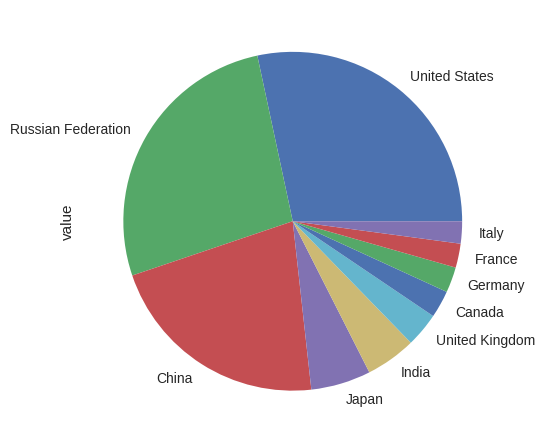

In [86]:
plt.style.use('seaborn')
new_data.groupby('country_name')['value'].sum().sort_values(ascending= False)[0:10].plot(kind='pie')

**Observation: From the top 10 Co2 emission countries 4 are from Asia only.**

# Representaion of the Countries over the year from 1960-2019 via Map. It Changes color w.r.t Time

In [87]:
fig = px.choropleth(new_data, locations= 'country_code',  range_color=(0, 12), 
                     color_continuous_scale = px.colors.sequential.Plasma, color='value',hover_name='country_name',
                    animation_frame='year')
fig.show()

# Observations:

Germany is the only country from top economies who lashes its Co2 emission 
upto 50% from the 1960-till date.


Asia's Energy need is continuosly increasing, and that's why it is top 
leading continent in Co2 Emission. Out of the Asia China,Russia,Japan,India and Korea are the leading Ones.

In North America Continent USA is the obly country which contributes more than 80% in Co2 emission.

In Europe Continent, Countries are concerning regarding the climate. top economies like Germany and France continuosly showing effort to reduce their Co2 emission.

Some of the countries from Top economies who increases their contribution 5 times like Japan and some of them upto 20 times like India.

Russia is visible in both (Europe & Asia)continents 

Out of the top 10 Co2 emission countries 4 are from Asia continent only.




